# K-nearest neighbors and cross-validation
The task is to program my own implementation of k-nearest neighbors (kNN) and a way to compute cross-validation for it.
I follow this: A tutorial To Implement k-Nearest Neighbors in Python From Scratch: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

I load Iris data Set http://archive.ics.uci.edu/ml/datasets/Iris from the UCI machine learning repository: http://archive.ics.uci.edu/ml/. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,
                 names=['sepal length', 'sepal width', 'petal length', 'petal width','species'] )
print(df.head())
df.shape

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


(150, 5)

In [3]:
X = df.loc[:, "sepal length":"petal width"]
X = X.values 
X.shape

(150, 4)

In [4]:
y = df.loc[:, "species"]
y=y.values
y.shape

(150,)

I need a function to divide the data into folds:

In [5]:
def partition(n, numberOfFolds):
    folds = []
    S = set(range(n))
    for f in range(numberOfFolds):
        fold = set()
        for i in list(S)[f:len(S):numberOfFolds]:
            fold.add(i)
        folds.append(fold)
    return folds, S

As a distance metric, I use Euclidean distance. 

In [6]:
def euclideanDistance(x1,x2):   
    return np.sqrt(np.sum((x1-x2)**2))

Next I need a function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function). I used help from here again: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/.

In [7]:
import operator
def getNeighbors(X_train, X_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclideanDistance(X_test, X_train[i])
        distances.append((X_train[i], dist, i))
    distances.sort(key=operator.itemgetter(1))
    neighbors_ind = []
    for x in range(k):
        neighbors_ind.append(distances[x][2])
    return neighbors_ind

Now I can predict the class by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.  I used help from here: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/.

In [8]:
def knnPredictClass(neighbors_ind, y_train):
    classVotes = {}
    for i in range(len(neighbors_ind)):
        response = y_train[neighbors_ind[i]]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


This function I use to evaluate the accuracy of predictions:

In [9]:
def getAccuracy(y_test, y_predicted):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] is y_predicted[i]:
            correct +=1
    return (correct/float(len(y_test)))* 100.0

Now I am ready for kNN-function.

In [11]:
def kNNclassification(X,y,folds,S, k=3):
    accuracy =[]
    for n in range(len(folds)):
        X_train=X[list(S-folds[n])]
        y_train=y[list(S-folds[n])] 
        X_test=X[list(folds[n])]
        y_test=y[list(folds[n])]
        y_predicted=[]
        for i in range(len(X_test)):
            neighbors_ind = getNeighbors(X_train, X_test[i], k)
            prediction = knnPredictClass(neighbors_ind, y_train)
            y_predicted.append(prediction)
        acc = getAccuracy(y_test, y_predicted)
        accuracy.append(acc)
    print('With k =',k,', test set accuracy: ',np.mean(accuracy), '%' )
    return np.mean(accuracy)

I run my kNN-function with k=1..50 (the number of folds is 10)

In [12]:
numberOfFolds=10
folds, S = partition(len(y), numberOfFolds)
meanAccuracy=[]
for k in range(1,51):
    a=kNNclassification(X,y,folds, S, k)
    meanAccuracy.append(a)
print('Best accuracy: ', np.max(meanAccuracy), '% with k = ', (np.argmax(meanAccuracy)+1 ) )

With k = 1 , test set accuracy:  96.0 %
With k = 2 , test set accuracy:  96.0 %
With k = 3 , test set accuracy:  96.66666666666666 %
With k = 4 , test set accuracy:  96.66666666666666 %
With k = 5 , test set accuracy:  96.66666666666666 %
With k = 6 , test set accuracy:  96.66666666666666 %
With k = 7 , test set accuracy:  97.33333333333333 %
With k = 8 , test set accuracy:  97.33333333333333 %
With k = 9 , test set accuracy:  96.66666666666666 %
With k = 10 , test set accuracy:  97.33333333333333 %
With k = 11 , test set accuracy:  97.33333333333333 %
With k = 12 , test set accuracy:  97.33333333333333 %
With k = 13 , test set accuracy:  97.33333333333333 %
With k = 14 , test set accuracy:  97.33333333333333 %
With k = 15 , test set accuracy:  97.33333333333333 %
With k = 16 , test set accuracy:  97.33333333333333 %
With k = 17 , test set accuracy:  98.0 %
With k = 18 , test set accuracy:  98.0 %
With k = 19 , test set accuracy:  98.0 %
With k = 20 , test set accuracy:  98.0 %
With k 

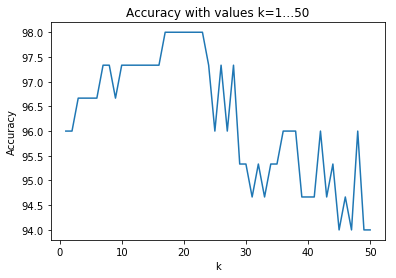

The best classification accuracy achieved:  98.0 %, with k =  17


In [13]:
k = np.arange(1 , 51)
plt.plot(k, meanAccuracy )
plt.title('Accuracy with values k=1…50')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

print('The best classification accuracy achieved: ',max(meanAccuracy), '%, with k = ', (np.argmax(meanAccuracy)+1 ))

Now I will check if the sklearn's KNeighborsClassifier gives the same answers:


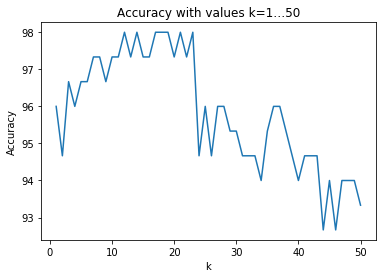

The best classification accuracy achieved:  98.0 , with k =  12


In [14]:
from sklearn.neighbors import KNeighborsClassifier
accur_k = []
for k in range(1,51):
    accuracy = []
    for n in range(len(folds)):
        X_train=X[list(S-folds[n])]
        y_train=y[list(S-folds[n])] 
        X_test=X[list(folds[n])]
        y_test=y[list(folds[n])]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_p = knn.predict(X_test)
        acc = getAccuracy(y_test, y_p)
        accuracy.append(acc)
    accur_k.append(np.mean(accuracy))

k = np.arange(1 , 51)
plt.plot(k, accur_k )
plt.title('Accuracy with values k=1…50')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

print('The best classification accuracy achieved: ',max(accur_k), ', with k = ', (np.argmax(accur_k)+1 ))


It didn't give the same answer. I try to check why they differ. Thus I modify the functions a little in order to get testfunctions:

In [15]:
def testOwn_kNNclassification(X,y,folds,S, k):
    accuracy =[]
    for n in range(len(folds)):
        X_train=X[list(S-folds[n])]
        y_train=y[list(S-folds[n])] 
        X_test=X[list(folds[n])]
        y_test=y[list(folds[n])]
        y_predicted=[]
        for i in range(len(X_test)):
            neighbors_ind = getNeighbors(X_train, X_test[i], k)
            prediction = knnPredictClass(neighbors_ind, y_train)
            y_predicted.append(prediction)
        acc = getAccuracy(y_test, y_predicted)
        accuracy.append(acc)
        print('Accuracy: ', acc, '%') #this is added for testing purposes
    print('With k =',k,', test set accuracy: ',np.mean(accuracy), '%' )

In [16]:
def testSklearn_kNNclassification(X,y,folds,S, k):
    accuracy =[]
    for n in range(len(folds)):
        X_train=X[list(S-folds[n])]
        y_train=y[list(S-folds[n])] 
        X_test=X[list(folds[n])]
        y_test=y[list(folds[n])]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_p = knn.predict(X_test)
        acc = getAccuracy(y_test, y_p)
        accuracy.append(acc)
        print('Accuracy: ', acc, '%') #this is added for testing purposes
    print('With k =',k,', test set accuracy: ',np.mean(accuracy), '%' )

In [17]:
print('own classification:')
testOwn_kNNclassification(X,y,folds, S, 12)
print('sklearn classification:')
testSklearn_kNNclassification(X,y,folds, S, 12)

own classification:
Accuracy:  93.33333333333333 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  93.33333333333333 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  86.66666666666667 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  100.0 %
With k = 12 , test set accuracy:  97.33333333333333 %
sklearn classification:
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  93.33333333333333 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  86.66666666666667 %
Accuracy:  100.0 %
Accuracy:  100.0 %
Accuracy:  100.0 %
With k = 12 , test set accuracy:  98.0 %


Let's test more careful the case: k=12, first fold.

In [18]:
def test_knnPredictClass(neighbors_ind, y_train):
    classVotes = {}
    for i in range(len(neighbors_ind)):
        response = y_train[neighbors_ind[i]]
        #print(i, neighbors_ind[i], response)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    print('Votes:',classVotes)
    print('Choice:', sortedVotes[0][0])
    print()
    return sortedVotes[0][0]

def test2_Own_kNNclassification(X,y,folds,S, k):
    
    X_train=X[list(S-folds[0])]
    y_train=y[list(S-folds[0])] 
    X_test=X[list(folds[0])]
    y_test=y[list(folds[0])]
    y_predicted=[]
    for i in range(len(X_test)):
        print('round:', i)
        neighbors_ind = getNeighbors(X_train, X_test[i], k)
        prediction = test_knnPredictClass(neighbors_ind, y_train)
        y_predicted.append(prediction)
    acc = getAccuracy(y_test, y_predicted)
    print('y_test[3]:', y_test[3])
    print('y_predicted[3]:', y_predicted[3])
    


test2_Own_kNNclassification(X,y,folds,S, 12)


    

round: 0
Votes: {'Iris-setosa': 12}
Choice: Iris-setosa

round: 1
Votes: {'Iris-virginica': 12}
Choice: Iris-virginica

round: 2
Votes: {'Iris-virginica': 12}
Choice: Iris-virginica

round: 3
Votes: {'Iris-virginica': 6, 'Iris-versicolor': 6}
Choice: Iris-virginica

round: 4
Votes: {'Iris-setosa': 12}
Choice: Iris-setosa

round: 5
Votes: {'Iris-setosa': 12}
Choice: Iris-setosa

round: 6
Votes: {'Iris-virginica': 12}
Choice: Iris-virginica

round: 7
Votes: {'Iris-virginica': 11, 'Iris-versicolor': 1}
Choice: Iris-virginica

round: 8
Votes: {'Iris-versicolor': 12}
Choice: Iris-versicolor

round: 9
Votes: {'Iris-versicolor': 11, 'Iris-virginica': 1}
Choice: Iris-versicolor

round: 10
Votes: {'Iris-setosa': 12}
Choice: Iris-setosa

round: 11
Votes: {'Iris-virginica': 12}
Choice: Iris-virginica

round: 12
Votes: {'Iris-versicolor': 12}
Choice: Iris-versicolor

round: 13
Votes: {'Iris-versicolor': 12}
Choice: Iris-versicolor

round: 14
Votes: {'Iris-setosa': 12}
Choice: Iris-setosa

y_test[3

We can see here, that on the round 3, the nearest neighbours are: 'Iris-virginica': 6, 'Iris-versicolor': 6. 
My own classification function chooses Iris-virginica. If it would have chosen Iris-versicolor, the accuracy would have been 100%. So, it is just bad luck, that my own function and the sklearn's KNeighborsClassifier gives different answers.

I continue with programming a nested CV. I implement nested-cross-validation to estimate the classification accuracy of K-nn method that selects the optimal value k=1…20. The number of folds is 10.

In [19]:
def inner(X,y):
    numberOfFolds=10
    folds, S = partition(len(y), numberOfFolds)
    accur_k = []
    for k in range(1,21):
        accuracy = []    
        for n in range(len(folds)):
            X_train=X[list(S-folds[n])]
            y_train=y[list(S-folds[n])] 
            X_test=X[list(folds[n])]
            y_test=y[list(folds[n])]
            y_predicted=[]
            for i in range(len(X_test)):
                neighbors_ind = getNeighbors(X_train, X_test[i], k)
                prediction = knnPredictClass(neighbors_ind, y_train)
                y_predicted.append(prediction)
            acc = getAccuracy(y_test, y_predicted)
            accuracy.append(acc)
        accur_k.append(np.mean(accuracy))
    return np.argmax(accur_k)+1

In [20]:
def outer(X_inner,y_inner,X_outer,y_outer, k):
    y_predicted=[]
    for i in range(len(X_outer)):
        neighbors_ind = getNeighbors(X_inner, X_outer[i], k)
        prediction = knnPredictClass(neighbors_ind, y_inner)
        y_predicted.append(prediction)
    acc = getAccuracy(y_outer, y_predicted)
    return acc

In [21]:
accuracy_outer=[]
k_best_outer=[]
numberOfFolds=10
folds, S = partition(len(y), numberOfFolds)
for n in range(len(folds)):
    X_inner=X[list(S-folds[n])]
    y_inner=y[list(S-folds[n])]  
    X_outer=X[list(folds[n])]
    y_outer=y[list(folds[n])]
    k_best=inner(X_inner,y_inner)
    k_best_outer.append(k_best)
    acc_out=outer(X_inner,y_inner,X_outer,y_outer, k_best)
    accuracy_outer.append(acc_out)

print('accuracy: ', np.mean(accuracy_outer))

accuracy:  98.0


I am a little bit supprised that the estimation for classification accuracy with nested CV is the same than the best accuracy earlier. I expected it to be little less. Therefore I want to check the values of best k and accuracy on every round.

In [22]:
print('k:', k_best_outer)
print('accuracy:',accuracy_outer)

k: [11, 11, 8, 13, 12, 17, 7, 13, 7, 17]
accuracy: [100.0, 100.0, 93.33333333333333, 93.33333333333333, 100.0, 100.0, 93.33333333333333, 100.0, 100.0, 100.0]


The accuracy derives between 93% and 100%. I can believe that :) 
